<a href="https://colab.research.google.com/github/EnockObwon/water-potability-analysis/blob/main/analysis_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
!mkdir -p /content/water_potability_analysis

In [49]:
!git config --global init.defaultBranch main

In [48]:
!cd /content/water_potability_analysis && git init

Reinitialized existing Git repository in /content/water_potability_analysis/.git/


In [64]:
# Part 1: Data Cleaning and Manipulation
import pandas as pd
import numpy as np


# load data

df = pd.read_csv('/content/water_potability.csv')

In [51]:
# initial exploration
print(df.head())

         ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0  


In [52]:
# initial data exploration
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB
None


In [53]:
# initial data exploration
print(df.describe())

                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  


In [55]:
# Data cleaning

# identify columns with missing data

missing_counts = df.isnull().sum()
print('Missing Values per Column:')
print(missing_counts)

# fill missing valves with the mean of their columns for 'ph' and 'Sulfate'

for col in ['ph', 'Sulfate']:
  df[col] = df[col].fillna(df[col].mean())
  print(f'Filled missing values in {col} with the mean value.')

Missing Values per Column:
ph                   0
Hardness             0
Solids               0
Chloramines          0
Sulfate              0
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64
Filled missing values in ph with the mean value.
Filled missing values in Sulfate with the mean value.


In [56]:
# verify no missing values remain in the columns

print('\nMissing Values per Column after Cleaning:')
print(df.isnull().sum())


Missing Values per Column after Cleaning:
ph                   0
Hardness             0
Solids               0
Chloramines          0
Sulfate              0
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64


In [57]:
# check for duplicate rows

duplicate_rows = df[df.duplicated()]
print(f'Number of Duplicate Rows: {len(duplicate_rows)}')

# remove duplicate rows

if not duplicate_rows.empty:
  df = df.drop_duplicates()
  print('Duplicate rows removed.')
else:
  print('No duplicate rows found.')

Number of Duplicate Rows: 0
No duplicate rows found.


In [58]:
# confirm the removal of duplicates

print(f'Dataset shape after removing duplicates: {df.shape}')

Dataset shape after removing duplicates: (3276, 10)


In [59]:
# Data transformation and analysis
def classify_ph(ph_value):
  if ph_value < 6.5:
    return 'Acidic'
  elif 6.5 <= ph_value <= 7.5:
    return 'Neutral'
  else:
    return 'Alkaline'

# apply the function to create the new 'ph_level' column

df['ph_level'] = df['ph'].apply(classify_ph)
print('New column "ph_level" created.')

New column "ph_level" created.


In [60]:
# Display the new column of ph_level

print(df[['ph', 'ph_level']])

            ph  ph_level
0     7.080795   Neutral
1     3.716080    Acidic
2     8.099124  Alkaline
3     8.316766  Alkaline
4     9.092223  Alkaline
...        ...       ...
3271  4.668102    Acidic
3272  7.808856  Alkaline
3273  9.419510  Alkaline
3274  5.126763    Acidic
3275  7.874671  Alkaline

[3276 rows x 2 columns]


In [61]:
# Grouping and Aggregation

# Group the data by 'Potability' and calculate mean values for 'Hardness' and 'Chloramines'
grouped_mean = df.groupby('Potability')[['Hardness', 'Chloramines']].mean()
print('Average Hardness & Chloramines by Potability:')
print(grouped_mean)

Average Hardness & Chloramines by Potability:
              Hardness  Chloramines
Potability                         
0           196.733292     7.092175
1           195.800744     7.169338


In [62]:
# insight extraction

# find rows with maximum 'Solids' value

max_solids_row = df.loc[df['Solids'].idxmax()]

# extract pH and Hardness from row

max_ph = max_solids_row['ph']
max_hardness = max_solids_row['Hardness']

print(f'pH of sample with highest Solids: {max_ph}')
print(f'Hardness of sample with highest Solids: {max_hardness}')

pH of sample with highest Solids: 7.080794504276835
Hardness of sample with highest Solids: 159.39939804233876


In [65]:
# saving cleaned data
output_path = '/content/water_potability_analysis/cleaned_water_potability.csv'
df.to_csv(output_path, index=False)
print(f'Cleaned data saved to {output_path}')

Cleaned data saved to /content/water_potability_analysis/cleaned_water_potability.csv


In [67]:
# Part 2: Data Visulization and Storytelling

# use cleaned data to create a visual report

# creating visulization dashboard

# import neccessary libraries

import matplotlib.pyplot as plt
import seaborn as sns

# load the cleaned data

df = pd.read_csv('/content/water_potability_analysis/cleaned_water_potability.csv')

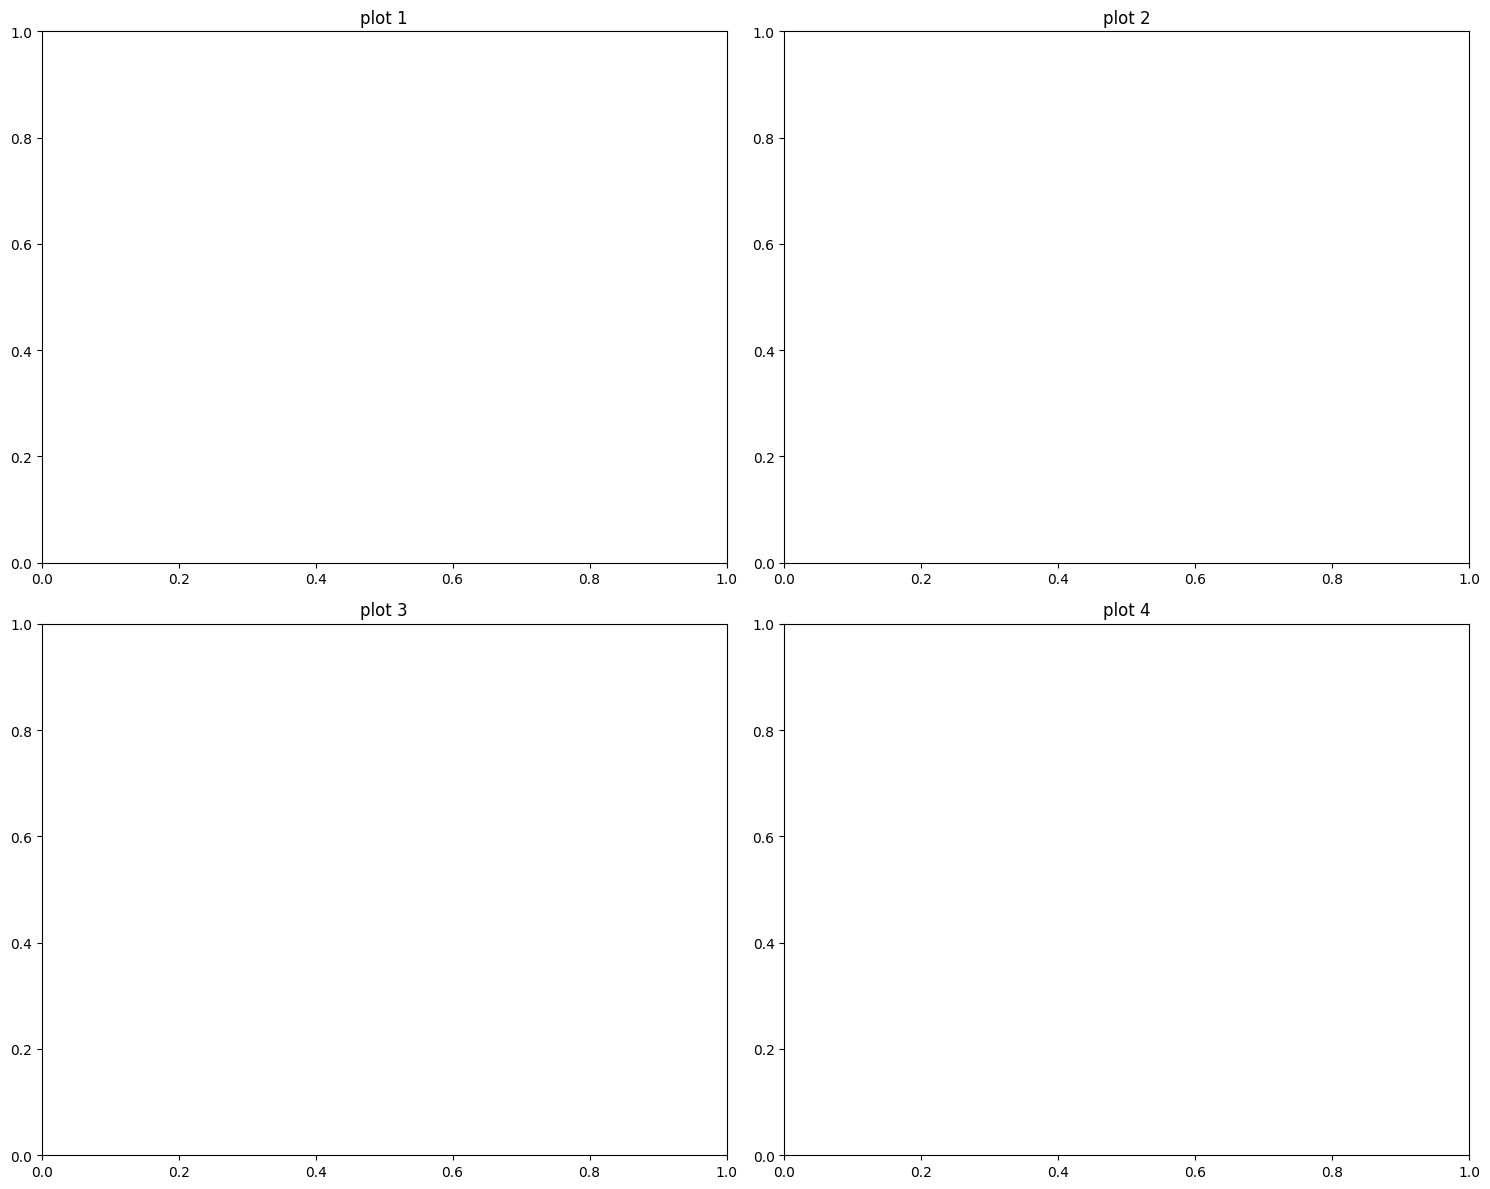

In [76]:
# create a 2x2 grid of plots

fig, axs = plt.subplots(2, 2, figsize=(15, 12))

axs[0, 0].set_title('plot 1')
axs[0, 1].set_title('plot 2')
axs[1, 0].set_title('plot 3')
axs[1, 1].set_title('plot 4')

# adjust layout to prevent overlap

plt.tight_layout()
plt.show()

/tmp/ipython-input-1770314745.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[0, 0].set_xticklabels(['Not Potable (0)', 'Potable (1)'])
/tmp/ipython-input-1770314745.py:33: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 0].set_xticklabels(['Not Potable (0)', 'Potable (1)'])


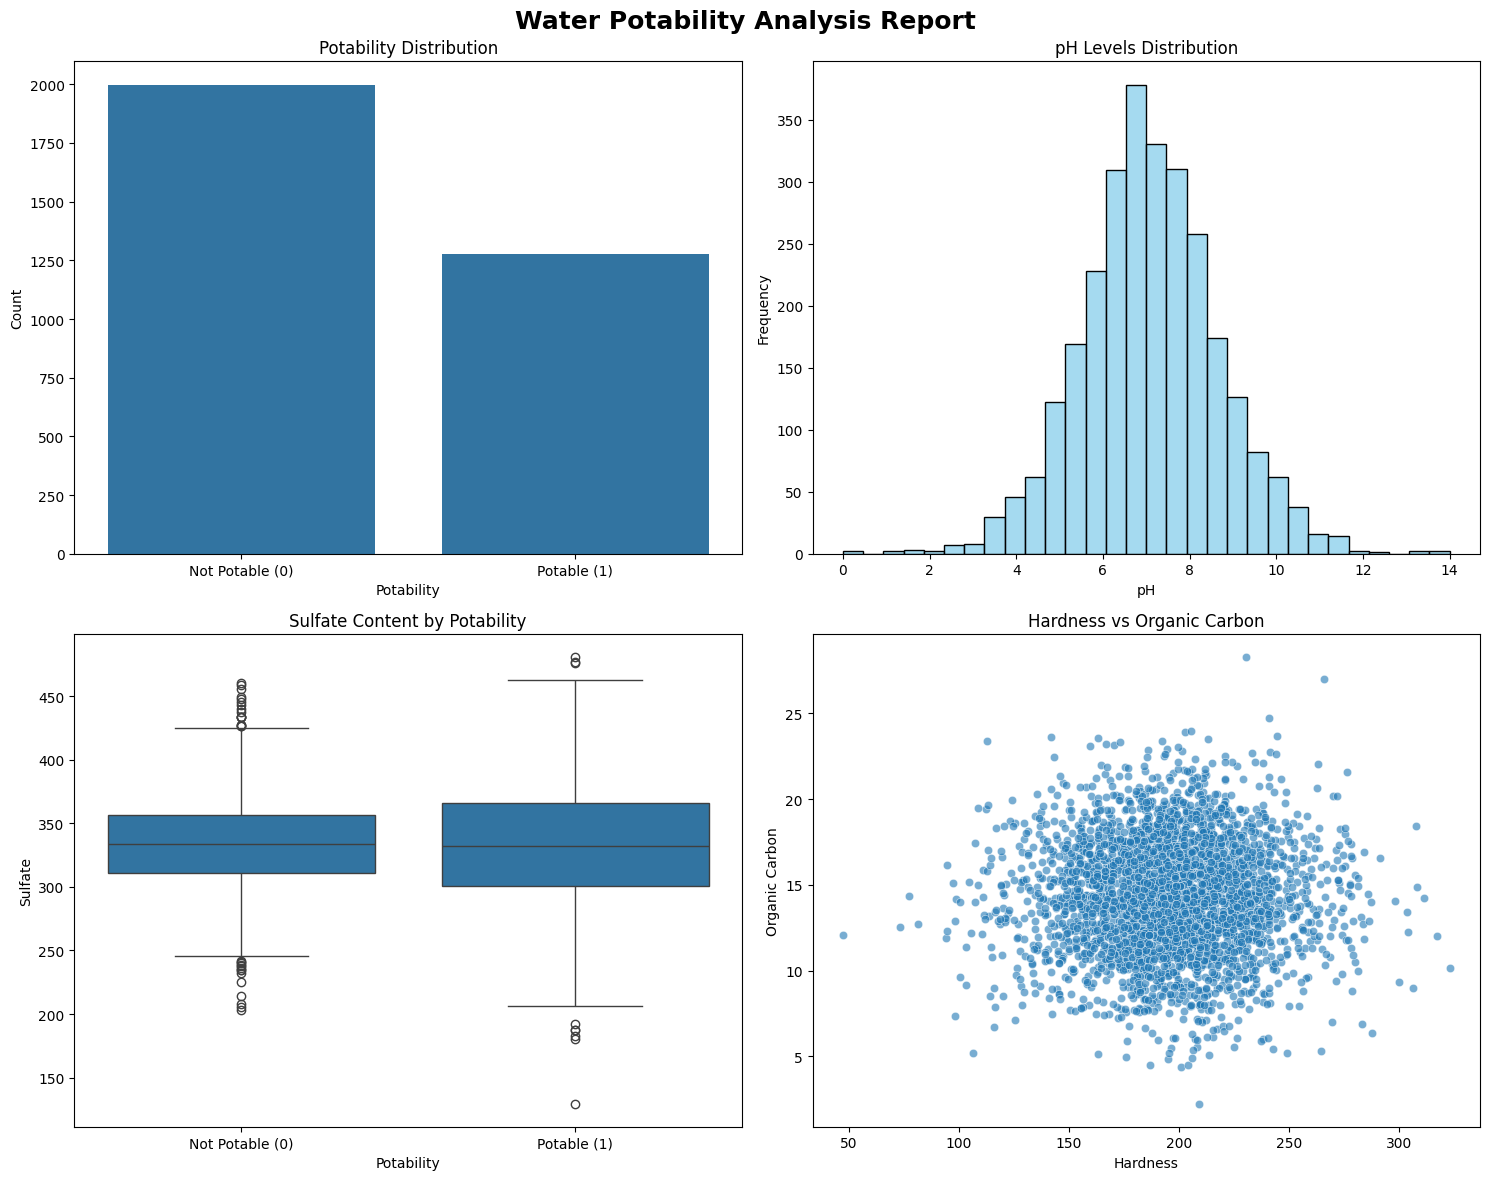

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

# customize plots: every plot has clear title, x-axis label & y-axis label
# Create the 2x2 subplot grid
fig, axs = plt.subplots(2, 2, figsize=(15, 12))

# Clear the existing plots if any (optional)
for ax_row in axs:
    for ax in ax_row:
        ax.clear()

# Plot 1: Potability Distribution (Bar plot)
sns.countplot(x='Potability', data=df, ax=axs[0, 0])
axs[0, 0].set_title('Potability Distribution')
axs[0, 0].set_xlabel('Potability')
axs[0, 0].set_ylabel('Count')
axs[0, 0].set_xticklabels(['Not Potable (0)', 'Potable (1)'])

# Plot 2: pH Level Distribution (Histogram)
sns.histplot(data=df, x='ph', bins=30, kde=False, ax=axs[0, 1], color='skyblue')
axs[0, 1].set_title('pH Levels Distribution')
axs[0, 1].set_xlabel('pH')
axs[0, 1].set_ylabel('Frequency')

# Plot 3: Sulfate Content by Potability (Box Plot) in bottom-left subplot
sns.boxplot(x='Potability', y='Sulfate', data=df, ax=axs[1, 0])

axs[1, 0].set_title('Sulfate Content by Potability')
axs[1, 0].set_xlabel('Potability')
axs[1, 0].set_ylabel('Sulfate')

axs[1, 0].set_xticklabels(['Not Potable (0)', 'Potable (1)'])

# Plot 4: Hardness vs. Organic Carbon (Scatter Plot)
sns.scatterplot(x='Hardness', y='Organic_carbon', data=df, ax=axs[1, 1], alpha=0.6)
axs[1, 1].set_title('Hardness vs Organic Carbon')
axs[1, 1].set_xlabel('Hardness')
axs[1, 1].set_ylabel('Organic Carbon')

# Add main title for the whole figure
fig.suptitle('Water Potability Analysis Report', fontsize=18, fontweight='bold')

plt.tight_layout()
plt.show()

Storytelling

The dataset appears relatively balanced between potable and non-potable samples, enabling fair analysis without major class imbalance concerns. The bar chart clearly shows similar counts of potable and non-potable water samples, which helps in drawing reliable conclusions from the data

The box plot of sulfate content reveals a noticeable difference between potable and non-potable water, with non-potable water generally exhibiting higher sulfate concentrations. This suggests that sulfate levels could be a key factor influencing potability. Additionally, the pH distribution mostly centers around neutral values, which aligns with water quality standards and indicates that extreme acidity or alkalinity is less common

The scatter plot highlights relationships between hardness and organic carbon, implying these parameters may also impact water quality. Overall, the data tells a story where chemical factors like sulfate concentration, hardness, pH, and organic content collectively influence water potability, reaffirming the need to monitor these indicators closely for safe drinking water assessment